In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

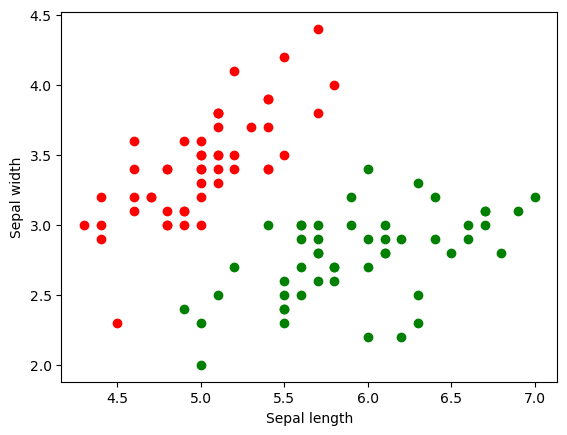

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green')

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [22]:
y_predicted = knn.predict(X_test)

In [23]:
y_test.values

array([1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 1])

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted values')

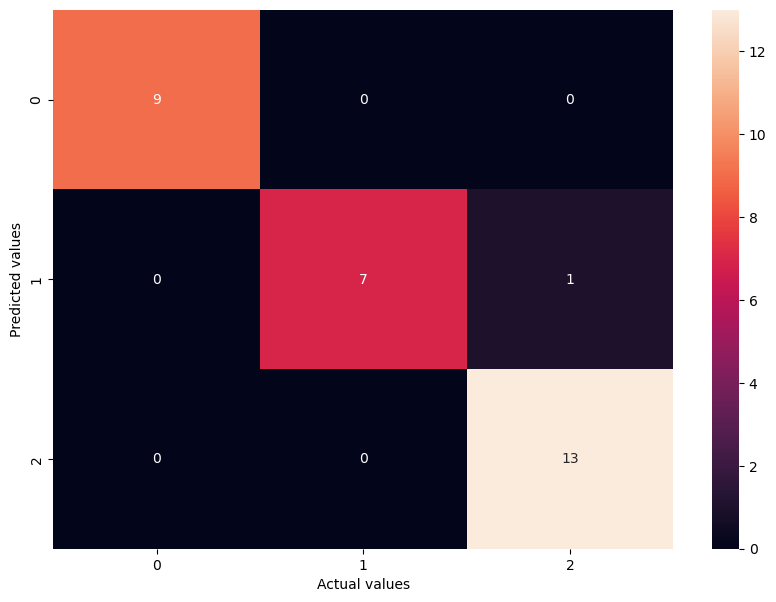

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Exercise

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()

In [34]:
X = digits.data
y = digits.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9888888888888889

In [39]:
y_predicted = knn.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 37]], dtype=int64)

<Figure size 700x500 with 0 Axes>

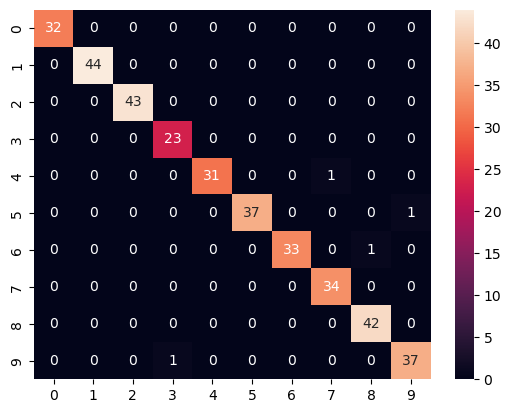

<Figure size 700x500 with 0 Axes>

In [47]:
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
sns.heatmap(cm, annot=True)
plt.figure(figsize=(7, 5))

In [48]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        43
           3       0.96      1.00      0.98        23
           4       1.00      0.97      0.98        32
           5       1.00      0.97      0.99        38
           6       1.00      0.97      0.99        34
           7       0.97      1.00      0.99        34
           8       0.98      1.00      0.99        42
           9       0.97      0.97      0.97        38

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Score of the model is 0.9916666666666667


<Figure size 700x500 with 0 Axes>

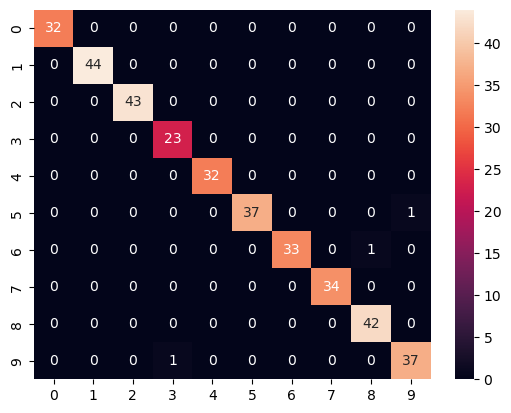

<Figure size 700x500 with 0 Axes>

In [52]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
score = (knn.score(X_test, y_test))
print(f"Score of the model is {score}")

y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
sns.heatmap(cm, annot=True)
plt.figure(figsize=(7, 5))